# Fruit and Veg Detection Data

### In this project, we will train fruit types. To do this, we will first scan the pictures in the folder containing the fruit pictures, then reduce their size and normalize them, and then train them with deep learning.
### Finally, we will re-train the images with Transfer Learning

<a href='https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition' target=_blank>You can find the data file here</a>

<img src=https://i.pinimg.com/736x/03/5c/af/035caf5b655bbee0bf37631f97a71e9c.jpg width='400'>

In [1]:
#pip install opencv-python

In [2]:
import cv2
import pandas as pd
import os

In [62]:
os.listdir('train/') 

['apple',
 'turnip',
 'chilli pepper',
 'raddish',
 'bell pepper',
 'pear',
 'sweetpotato',
 'pomegranate',
 'peas',
 'capsicum',
 'spinach',
 'lettuce',
 'kiwi',
 'lemon',
 'onion',
 'cauliflower',
 'potato',
 'jalepeno',
 'sweetcorn',
 'cucumber',
 'paprika',
 'watermelon',
 'mango',
 'cabbage',
 'grapes',
 'beetroot',
 'eggplant',
 'corn',
 'soy beans',
 'banana',
 'ginger',
 'garlic',
 'pineapple',
 'tomato',
 'orange',
 'carrot']

In [4]:
labels = ['apple','turnip','chilli pepper','raddish','bell pepper','pear','sweetpotato','pomegranate','peas',
          'capsicum','spinach','lettuce','kiwi','lemon','onion','cauliflower','potato','jalepeno',
          'sweetcorn','cucumber','paprika','watermelon','mango','cabbage','grapes','beetroot','eggplant',
          'corn','soy beans','banana','ginger','garlic','pineapple','tomato','orange','carrot']
img_path = 'train/'

In [5]:
import os

dir_path = 'train/'

# Delete the .DS_Store file in the train/ directory.
# Sometimes a file like this appears on Macbook

ds_store_path = os.path.join(dir_path, '.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

In [6]:
os.listdir('train/') 

['apple',
 'turnip',
 'chilli pepper',
 'raddish',
 'bell pepper',
 'pear',
 'sweetpotato',
 'pomegranate',
 'peas',
 'capsicum',
 'spinach',
 'lettuce',
 'kiwi',
 'lemon',
 'onion',
 'cauliflower',
 'potato',
 'jalepeno',
 'sweetcorn',
 'cucumber',
 'paprika',
 'watermelon',
 'mango',
 'cabbage',
 'grapes',
 'beetroot',
 'eggplant',
 'corn',
 'soy beans',
 'banana',
 'ginger',
 'garlic',
 'pineapple',
 'tomato',
 'orange',
 'carrot']

In [7]:
import os

img_list = []
label_list = []

valid_extensions = ['.jpg','.png']

for label in labels:
    for img_file in os.listdir(img_path + label):
        ext = os.path.splitext(img_file)[1]
        if ext.lower() in valid_extensions:
            img_list.append(img_path + label + '/' + img_file)
            label_list.append(label)

In [8]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [9]:
df.tail(20)

,img,label
3035,train/carrot/Image_46.jpg,carrot
3036,train/carrot/Image_91.jpg,carrot
3037,train/carrot/Image_85.jpg,carrot
3038,train/carrot/Image_84.jpg,carrot
3039,train/carrot/Image_90.jpg,carrot
3040,train/carrot/Image_47.jpg,carrot
3041,train/carrot/Image_6.jpg,carrot
3042,train/carrot/Image_53.jpg,carrot
3043,train/carrot/Image_34.jpg,carrot
3044,train/carrot/Image_20.jpg,carrot


In [10]:
df.sample(15)

,img,label
1735,train/paprika/Image_66.jpg,paprika
1541,train/sweetcorn/Image_75.png,sweetcorn
1983,train/cabbage/Image_73.jpg,cabbage
2058,train/grapes/Image_63.jpg,grapes
2065,train/grapes/Image_9.jpg,grapes
114,train/turnip/Image_83.png,turnip
1412,train/potato/Image_79.jpg,potato
2805,train/pineapple/Image_21.jpg,pineapple
1988,train/cabbage/Image_72.jpg,cabbage
13,train/apple/Image_60.jpg,apple


In [11]:
d= {
    
    'apple':0,
    'turnip':1,
    'chilli pepper':2,
    'raddish':3,
    'bell pepper':4,
    'pear':5,
    'sweetpotato':6,
    'pomegranate':7,
    'peas':8,
    'capsicum':9,
    'spinach':10,
    'lettuce':11,
    'kiwi':12,
    'lemon':13,
    'onion':14,
    'cauliflower':15,
    'potato':16,
    'jalepeno':17,
    'sweetcorn':18,
    'cucumber':19,
    'paprika':20,
    'watermelon':21,
    'mango':22,
    'cabbage':23,
    'grapes':24,
    'beetroot':25,
    'eggplant':26,
    'corn':27,
    'soy beans':28,
    'banana':29,
    'ginger':30,
    'garlic':31,
    'pineapple':32,
    'tomato':33,
    'orange':34,
    'carrot':35
  }

In [12]:
df['encode_label']=df['label'].map(d)

In [13]:
df.sample(50)

,img,label,encode_label
653,train/peas/Image_16.jpg,peas,8
576,train/pomegranate/Image_13.jpg,pomegranate,7
2200,train/beetroot/Image_52.jpg,beetroot,25
3045,train/carrot/Image_35.jpg,carrot,35
1678,train/cucumber/Image_78.jpg,cucumber,19
2707,train/garlic/Image_34.jpg,garlic,31
2620,train/ginger/Image_35.jpg,ginger,30
2362,train/corn/Image_79.jpg,corn,27
365,train/bell pepper/Image_43.jpg,bell pepper,4
1937,train/mango/Image_21.jpg,mango,22


In [14]:
import numpy as np

In [15]:
df['label'].value_counts()

label
peas             100
soy beans         97
turnip            96
pineapple         96
spinach           96
grapes            95
lettuce           94
onion             93
sweetcorn         91
cucumber          91
cabbage           90
garlic            90
tomato            90
kiwi              88
pear              88
beetroot          88
corn              87
capsicum          87
mango             86
bell pepper       85
chilli pepper     85
jalepeno          84
eggplant          84
watermelon        83
raddish           80
cauliflower       79
paprika           79
carrot            78
lemon             78
pomegranate       78
potato            75
banana            73
sweetpotato       69
apple             68
ginger            67
orange            67
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt

In [17]:
image=cv2.imread(str(df['img'][165]))

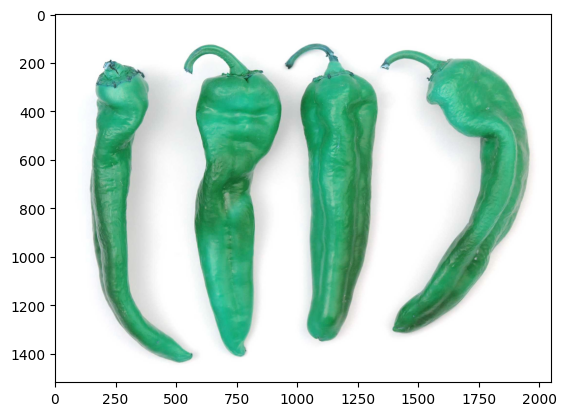

In [18]:
plt.imshow(image);

In [19]:
import cv2
import pandas as pd
import os

x = []
processed_paths = []

for img_path in df["img"]:
    try:
        img = cv2.imread(str(img_path))
        if img is None:
            raise FileNotFoundError(f"{img_path} file didn't read.")

        img = cv2.resize(img, (50,50))
        img = img / 255.0
        x.append(img)
        processed_paths.append(img_path)
    except Exception as e:
        print(f"Error: {e}")

        if os.path.exists(img_path):
            os.remove(img_path)
        else:
            print(f"Attention: {img_path} file has already been deleted or cannot be found.")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [20]:
x=np.array(x)

In [21]:
x

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [22]:
y=df['encode_label']

In [23]:
y.value_counts()

encode_label
8     100
28     97
1      96
32     96
10     96
24     95
11     94
14     93
18     91
19     91
23     90
31     90
33     90
12     88
5      88
25     88
27     87
9      87
22     86
4      85
2      85
17     84
26     84
21     83
3      80
15     79
20     79
35     78
13     78
7      78
16     75
29     73
6      69
0      68
30     67
34     67
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [48]:
model = Sequential()
model.add(Input(shape=(50,50,3)))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model. add (BatchNormalization ())
model.add(Conv2D(84, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(120, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(.5))

model.add(Flatten())
model.add(Dropout(.5))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(36, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=500,verbose=1)

Epoch 1/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.0816 - loss: 3.5448 - val_accuracy: 0.1015 - val_loss: 3.4810
Epoch 2/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.1674 - loss: 2.9459 - val_accuracy: 0.1047 - val_loss: 3.4564
Epoch 3/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.2110 - loss: 2.6886 - val_accuracy: 0.1620 - val_loss: 3.3224
Epoch 4/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.2783 - loss: 2.4717 - val_accuracy: 0.2275 - val_loss: 3.0520
Epoch 5/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.2948 - loss: 2.3586 - val_accuracy: 0.2553 - val_loss: 2.7213
Epoch 6/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.3560 - loss: 2.1773 - val_accuracy: 0.2717 - val_loss: 2.6236
Epoch 7/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.3211 - loss: 2.1414 - val_accuracy: 0.2962 - val_loss: 2.5101
Epoch 8/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - accuracy: 0.3472 - loss: 2.0559 - 

77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.9172 - loss: 0.2605 - val_accuracy: 0.4550 - val_loss: 3.9172
Epoch 100/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - accuracy: 0.9222 - loss: 0.2459 - val_accuracy: 0.4239 - val_loss: 3.5626
Epoch 101/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.9362 - loss: 0.2135 - val_accuracy: 0.4615 - val_loss: 3.8837
Epoch 102/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.9193 - loss: 0.2670 - val_accuracy: 0.4632 - val_loss: 3.4593
Epoch 103/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9130 - loss: 0.2562 - val_accuracy: 0.4534 - val_loss: 3.6655
Epoch 104/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.9435 - loss: 0.1919 - val_accuracy: 0.4795 - val_loss: 3.2972
Epoch 105/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9430 - loss: 0.2030 - val_accuracy: 0.4795 - val_loss: 3.4749
Epoch 106/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9333 - loss: 0.2042 

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - accuracy: 0.9598 - loss: 0.1189 - val_accuracy: 0.4926 - val_loss: 3.9265
Epoch 198/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9621 - loss: 0.1180 - val_accuracy: 0.4583 - val_loss: 4.4146
Epoch 199/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9533 - loss: 0.1809 - val_accuracy: 0.4763 - val_loss: 4.1300
Epoch 200/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9615 - loss: 0.1076 - val_accuracy: 0.4730 - val_loss: 3.9094
Epoch 201/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.9585 - loss: 0.1723 - val_accuracy: 0.4697 - val_loss: 4.3005
Epoch 202/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9659 - loss: 0.1174 - val_accuracy: 0.4795 - val_loss: 4.5105
Epoch 203/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9689 - loss: 0.0901 - val_accuracy: 0.4779 - val_loss: 4.3832
Epoch 204/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.9564 - loss: 0.1266 

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9684 - loss: 0.0882 - val_accuracy: 0.4615 - val_loss: 4.4548
Epoch 296/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9643 - loss: 0.1224 - val_accuracy: 0.4910 - val_loss: 4.4860
Epoch 297/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.9598 - loss: 0.1452 - val_accuracy: 0.4779 - val_loss: 4.4727
Epoch 298/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.9605 - loss: 0.1148 - val_accuracy: 0.4599 - val_loss: 3.9111
Epoch 299/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9594 - loss: 0.1112 - val_accuracy: 0.4795 - val_loss: 4.3780
Epoch 300/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9648 - loss: 0.1188 - val_accuracy: 0.4959 - val_loss: 3.9895
Epoch 301/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.9714 - loss: 0.0711 - val_accuracy: 0.4992 - val_loss: 4.1512
Epoch 302/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9737 - loss: 0.0918 

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9696 - loss: 0.0985 - val_accuracy: 0.4763 - val_loss: 4.5325
Epoch 394/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.9770 - loss: 0.0811 - val_accuracy: 0.4975 - val_loss: 4.3882
Epoch 395/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9774 - loss: 0.0732 - val_accuracy: 0.4615 - val_loss: 4.1879
Epoch 396/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9753 - loss: 0.1064 - val_accuracy: 0.5303 - val_loss: 4.5880
Epoch 397/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9725 - loss: 0.1016 - val_accuracy: 0.4894 - val_loss: 4.4779
Epoch 398/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.9711 - loss: 0.0905 - val_accuracy: 0.5057 - val_loss: 4.6619
Epoch 399/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9812 - loss: 0.0509 - val_accuracy: 0.5041 - val_loss: 5.4698
Epoch 400/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.9792 - loss: 0.0573 

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9811 - loss: 0.0594 - val_accuracy: 0.4763 - val_loss: 4.6574
Epoch 492/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9797 - loss: 0.0525 - val_accuracy: 0.4697 - val_loss: 4.9960
Epoch 493/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.9716 - loss: 0.0738 - val_accuracy: 0.4959 - val_loss: 4.7346
Epoch 494/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.9837 - loss: 0.0654 - val_accuracy: 0.4632 - val_loss: 4.8212
Epoch 495/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9791 - loss: 0.0761 - val_accuracy: 0.4926 - val_loss: 4.9626
Epoch 496/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.9752 - loss: 0.0809 - val_accuracy: 0.4763 - val_loss: 4.7621
Epoch 497/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.9756 - loss: 0.0667 - val_accuracy: 0.4877 - val_loss: 4.8049
Epoch 498/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.9691 - loss: 0.0965 

In [50]:
loss,accuracy=model.evaluate(x_test,y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4827 - loss: 5.1247


In [51]:
accuracy

0.4844517111778259

In [52]:
tahmin=model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [53]:
model.save('model.h5')

In [54]:
import matplotlib.pyplot as plt

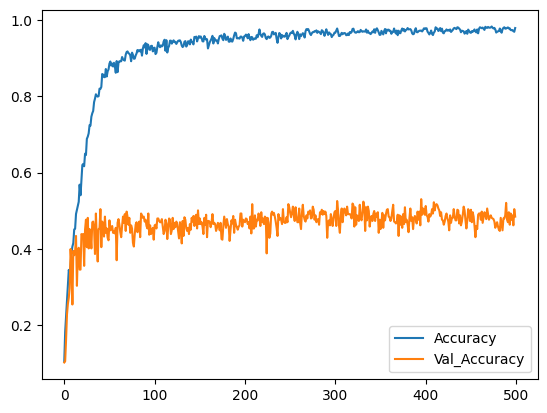

In [55]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [57]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[5, 0, 1, ..., 2, 0, 0],
       [0, 8, 0, ..., 0, 0, 0],
       [2, 0, 7, ..., 2, 1, 0],
       ...,
       [1, 0, 3, ..., 5, 0, 0],
       [0, 0, 2, ..., 2, 7, 1],
       [0, 0, 0, ..., 1, 0, 9]])

In [58]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

In [59]:
import seaborn as sns

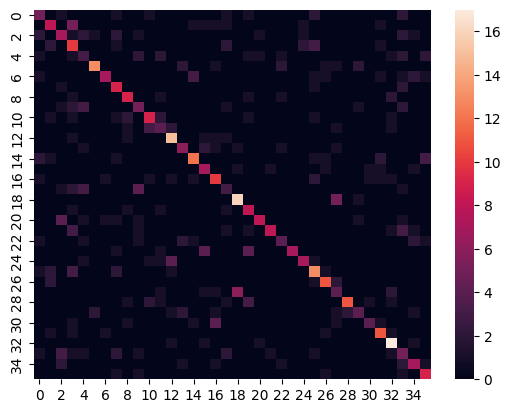

In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [61]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.33      0.36      0.34        14
           1       0.47      0.42      0.44        19
           2       0.35      0.33      0.34        21
           3       0.29      0.48      0.36        21
           4       0.19      0.18      0.18        17
           5       0.81      0.59      0.68        22
           6       0.70      0.39      0.50        18
           7       0.41      0.69      0.51        13
           8       0.56      0.60      0.58        15
           9       0.29      0.33      0.31        15
          10       0.53      0.47      0.50        19
          11       0.29      0.33      0.31        12
          12       0.60      0.75      0.67        20
          13       0.46      0.46      0.46        13
          14       0.63      0.52      0.57        23
          15       0.41      0.54      0.47        13
          16       0.48      0.50      0.49        20
          17       0.21    

## Transfer Learning

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
data_dir='train'
img_width,img_heigth=224,224 

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=.20) 

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='validation')

base_model=VGG16(weights='imagenet', input_shape=(img_width,img_heigth,3),include_top=False) 

model=Sequential()

model.add(base_model)                 
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(36,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 2510 images belonging to 36 classes.
Found 604 images belonging to 36 classes.


/Users/salihbekdemir/Desktop/dersler/anaconda3/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


/Users/salihbekdemir/Desktop/dersler/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 530s 7s/step - accuracy: 0.1836 - loss: 6.1646 - val_accuracy: 0.5894 - val_loss: 1.5355
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 551s 7s/step - accuracy: 0.7991 - loss: 0.7649 - val_accuracy: 0.6672 - val_loss: 1.1786
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 505s 6s/step - accuracy: 0.9403 - loss: 0.2893 - val_accuracy: 0.6507 - val_loss: 1.2079
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 461s 6s/step - accuracy: 0.9783 - loss: 0.1149 - val_accuracy: 0.7169 - val_loss: 1.0325
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 474s 6s/step - accuracy: 0.9869 - loss: 0.0740 - val_accuracy: 0.7020 - val_loss: 1.0178
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 485s 6s/step - accuracy: 0.9929 - loss: 0.0453 - val_accuracy: 0.7086 - val_loss: 1.0812
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.9881 - loss: 0.0662 - val_accuracy: 0.7003 - val_loss: 1.0627
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 505s 6s/step - accuracy: 0.9935 - loss: 0.0354 - val_accuracy: 0.6838 - val_loss: 1.

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 36)             │        36,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,898,798 (350.57 MB)

 Trainable params: 25,728,036 (98.14 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,456,074 (196.29 MB)

In [46]:
model.save('model.keras')

### Although I played with the values ​​such as BatchNormalization, Dropout, neuron numbers, ConV2 etc., unfortunately there are big differences between Accuracy and Val.Acuuracy, loss and Val.loss, so even though I increased the dropout values ​​and numbers, I could not get a good result